In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t grade3 -f roboto -fs 12 -cellw 60% -ofs 11 -dfs 11 -T

# 导入库

In [3]:
import baostock as bs
import pandas as pd
from matplotlib import pyplot as plt
from common import *

# class 定义

In [4]:
class StockQuery:
    def __init__(self):
        self.stock_list = pd.DataFrame()
        self.stock = {}

    def init(self):
        msg = bs.login()
        if msg.error_msg != 'success':
            print("Bao stock login error, code: {}, msg: {}".format(msg.error_code, msg.error_msg))

        rs = bs.query_all_stock("2023-9-28")

        self.stock_list = rs.get_data()
        self.stock = {}

    def query(self, code, start=None, end=None) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        start_date = start or '2023-04-01'
        end_date = end or '2023-9-28'

        rs = bs.query_history_k_data(code, 'date,open,high,low,close,volume', start_date=start_date,
                                     end_date=end_date)

        self.stock.update({code: rs.get_data()})
        return self.stock[code]

    def load(self, code) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        file = "./stacks/{}.csv".format(code)
        if code.startswith('b') or not os.path.isfile(file):
            return pd.DataFrame()

        data = pd.read_csv(file)
        self.stock.update({code: data})
        return data

    def load_all(self):
        code_list = self.stock_list['code']
        for code in code_list:
            if code.startswith('b'):
                continue
            data = pd.read_csv("./stacks/{}.csv".format(code))
            self.stock.update({code: data})
        return self.stock

    def query_all(self, start=None, end=None):
        code_list = self.stock_list['code']
        for i in range(code_list.shape[0]):
            data = self.query(code_list[i])
            data.to_csv("./stacks/{}.csv".format(code_list[i]), index=False)

        return self.stock

    def __del__(self):

        # bs.logout()
        pass

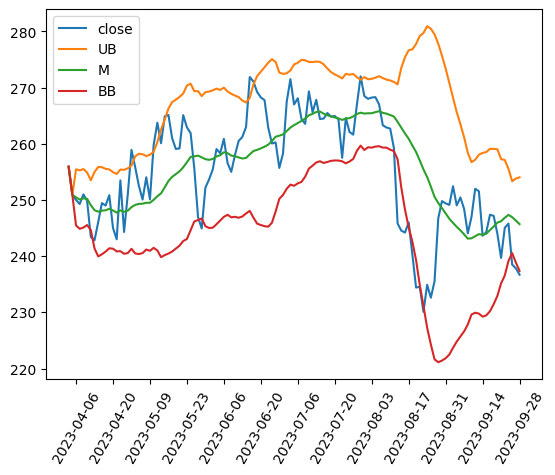

In [5]:
sq = StockQuery()
# sq.init()
data = sq.load('sz.002594')

plt.plot(data['close'], label="close")
plt.xticks(range(len(data['close']))[2::10], data['date'][2::10], rotation=60)
UB, M, BB = BOLL(data.close)
plt.plot(UB, label="UB")
plt.plot(M, label="M")
plt.plot(BB, label="BB")
plt.legend()
plt.show()



In [6]:
sq = StockQuery()
sq.init()
data = sq.load_all()


login success!


In [13]:
factor=0.03
rise1 = set()
for code,data in sq.stock.items():
    if data.shape[0]<1:
        continue
    i = data.shape[0]-1
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise1.add(code)
        
rise2 = set()
for code,data in sq.stock.items():
    if data.shape[0]<2:
        continue
    i = data.shape[0]-2
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise2.add(code)
        
rise3 = set()
for code,data in sq.stock.items():
    if data.shape[0]<3:
        continue
    i = data.shape[0]-3
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise3.add(code)

rise4 = set()
for code,data in sq.stock.items():
    if data.shape[0]<4:
        continue
    i = data.shape[0]-4
    rise = (data['close'][i] - data['open'][i])/data['open'][i]
    if rise>factor:
        rise4.add(code)
        
l1,l2,l3,l4 = [],[],[],[]
for code in rise1:
    if code in rise2:
        if code in rise3:   
            if code in rise4:        
                l4.append(code)
            else :
                l3.append(code)
        else :
            l2.append(code)
    else:
        l1.append(code)
print("\n\n\n")
print(l1)

print("\n\n\n")
print(l2)

print("\n\n\n")
print(l3)   

print("\n\n\n")
print(l4)        





['sz.002263', 'sh.688619', 'sh.688010', 'sh.600892', 'sz.300136', 'sz.300825', 'sz.002792', 'sh.688195', 'sh.688260', 'sh.688027', 'sz.300903', 'sz.002178', 'sz.000727', 'sz.002369', 'sz.300335', 'sz.300939', 'sz.300843', 'sz.002590', 'sz.300686', 'sz.301321', 'sh.688072', 'sz.002494', 'sz.300816', 'sz.300739', 'sh.605333', 'sz.301285', 'sh.603006', 'sz.000810', 'sz.300620', 'sh.605151', 'sh.600444', 'sz.002881', 'sz.300693', 'sz.300972', 'sz.300736', 'sh.600397', 'sz.002513', 'sz.300708', 'sz.002036', 'sh.600281', 'sz.002055', 'sz.300115', 'sh.688182', 'sh.688053', 'sz.000888', 'sh.603666', 'sh.688147', 'sz.002981', 'sz.000609', 'sh.603068', 'sh.603578', 'sh.600326', 'sz.300389', 'sz.002655', 'sz.002426', 'sz.300762', 'sh.688049', 'sh.688376', 'sz.002723', 'sz.300936', 'sh.600400', 'sz.300371', 'sh.600749', 'sh.603555', 'sh.605258', 'sz.300689', 'sz.300975', 'sz.002771', 'sz.002587', 'sz.300184', 'sh.600237', 'sz.300991', 'sz.300134', 'sh.688578', 'sz.300269', 'sh.688156', 'sz.300

In [8]:
sq.stock['sh.000001']

,date,open,high,low,close,volume
0,2023-04-03,3277.3400,3299.7321,3276.4158,3296.3960,35767677500
1,2023-04-04,3297.1830,3312.5615,3290.9925,3312.5578,38587161700
2,2023-04-06,3302.7510,3314.5262,3296.0550,3312.6280,32715542400
3,2023-04-07,3312.4813,3328.8455,3308.0610,3327.6457,28303224700
4,2023-04-10,3331.5051,3332.7152,3309.9171,3315.3578,34081984500
...,...,...,...,...,...,...
118,2023-09-22,3084.7567,3132.5578,3078.8007,3132.4316,28597835100
119,2023-09-25,3131.2079,3131.2079,3112.1505,3115.6071,25807188500
120,2023-09-26,3114.0214,3120.2889,3102.2726,3102.2726,22264431300
121,2023-09-27,3104.0395,3125.4470,3103.8441,3107.3156,24049583000
